#### Audio Classification Data Preprocessing

In [54]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='UrbanSound8K/all.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [55]:
print(librosa_audio_data)

[ 0.06904221  0.0349796   0.02097104 ... -0.13583112 -0.10976633
 -0.14507361]


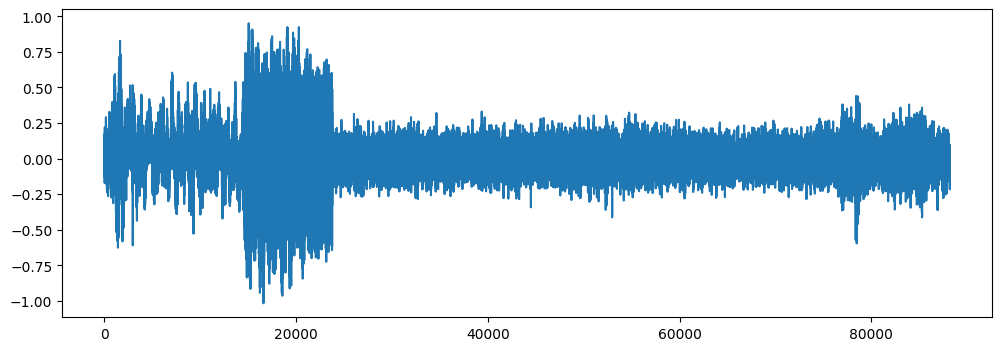

In [56]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

#### Observation
Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [57]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [58]:
wave_audio

array([[ 3126,  1545],
       [ 4834,  1267],
       [ 3007, -1412],
       ...,
       [-4898, -2930],
       [-4979, -4970],
       [-3397, -4133]], dtype=int16)

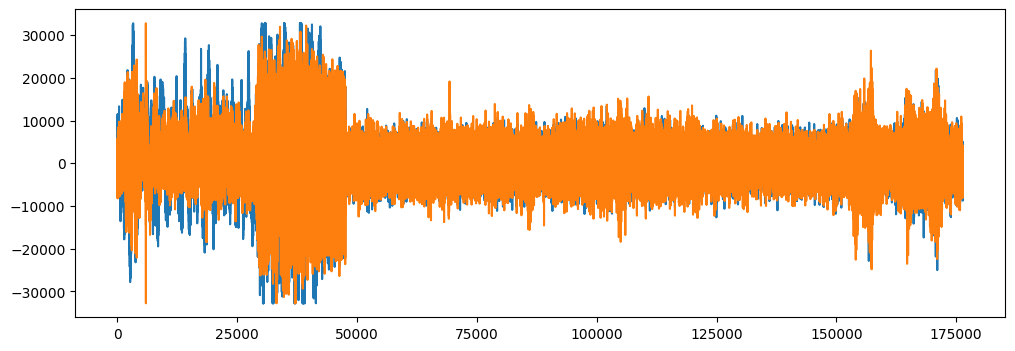

In [59]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

### Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio 
samples.
The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [7]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [8]:
mfccs

array([[-4.7486273e+02, -4.5088608e+02, -4.4905338e+02, ...,
        -4.7676157e+02, -4.7334869e+02, -4.9085260e+02],
       [ 1.1530264e+02,  1.1144249e+02,  1.1125224e+02, ...,
         1.1112500e+02,  1.1057970e+02,  1.0299150e+02],
       [-1.8326149e+01, -2.4682457e+01, -3.0259777e+01, ...,
        -8.2357607e+00, -9.0665321e+00, -4.5019574e+00],
       ...,
       [-2.8760440e+00, -3.2479742e+00, -4.8965545e+00, ...,
        -5.2023768e-01,  3.5672498e+00,  7.4937577e+00],
       [-4.2968404e-01, -5.8838916e-01, -8.1724107e-01, ...,
         1.8340725e-01,  7.6732248e-01,  2.7120023e+00],
       [-1.1780632e+00,  6.9809628e-01,  6.3521628e+00, ...,
        -2.6221943e+00, -4.7912722e+00, -3.1826310e+00]], dtype=float32)

In [9]:
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [10]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [11]:
pip install resampy


Note: you may need to restart the kernel to use updated packages.


In [12]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [09:09,  7.98it/s]E:\Anaconda\envs\myenv\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8325it [20:40,  8.79it/s]E:\Anaconda\envs\myenv\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8328it [20:40, 13.52it/s]E:\Anaconda\envs\myenv\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [21:36,  6.74it/s]


In [13]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [14]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [15]:
X.shape

(8732, 40)

In [16]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [19]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder


from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [22]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [24]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665260e+00, -1.36902380e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -3.25305080e+00, -5.27745247e+00, -1.55697155e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920441e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939763e+00, ...,
         7.42641389e-01,  7.33490944e-01,  7.11009085e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155220e+01, ...,
         1.46811938e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066067e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651139e+00]], dtype=float32)

In [25]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
X_train.shape

(6985, 40)

In [27]:
X_test.shape

(1747, 40)

In [28]:
y_train.shape

(6985, 10)

In [29]:
y_test.shape

(1747, 10)

### Model Creation

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [31]:
### No of classes
num_labels=y.shape[1]

In [32]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [34]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [35]:
pip install h5py==2.10.0


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [66 lines of output]
  E:\Anaconda\envs\myenv\lib\site-packages\setuptools\installer.py:27: SetuptoolsDeprecationWarning: setuptools.installer is deprecated. Requirements should be satisfied by a PEP 517 installer.
    warnings.warn(
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-310
  creating build\lib.win-amd64-cpython-310\h5py
  copying h5py\h5py_warnings.py -> build\lib.win-amd64-cpython-310\h5py
  copying h5py\highlevel.py -> build\lib.win-amd64-cpython-310\h5py
  copying h5py\ipy_completer.py -> build\lib.win-amd64-cpython-310\h5py
  copying h5py\version.py -> build\lib.win-amd64-cpython-310\h5py
  copying h5py\__init__.py -> build\lib.win-amd64-cpython-310\h5py
  creating build\lib.win-amd64-cpython-310\h5py\_hl
  copying h5py\_hl\attrs.py -> build\lib.win-amd64-cpython-310\h5py\_hl
  copying h5py\


     ---------------------------------------- 0.0/301.1 kB ? eta -:--:--
     --- ----------------------------------- 30.7/301.1 kB 1.3 MB/s eta 0:00:01
     ------------- ---------------------- 112.6/301.1 kB 939.4 kB/s eta 0:00:01
     ------------------ ----------------- 153.6/301.1 kB 919.0 kB/s eta 0:00:01
     ------------------------ ----------- 204.8/301.1 kB 958.4 kB/s eta 0:00:01
     --------------------------------- ---- 266.2/301.1 kB 1.0 MB/s eta 0:00:01
     -------------------------------------  297.0/301.1 kB 1.0 MB/s eta 0:00:01
     -------------------------------------  297.0/301.1 kB 1.0 MB/s eta 0:00:01
     ------------------------------------ 301.1/301.1 kB 775.5 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for h5py
Failed to build h5py
  Attempting uninstall: h5py
    Found existing installation: h5py 3.8.0
    Uninstalling h5py-3.8.0:
      Successfully uninstal

In [36]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)

start = datetime.now()

with tf.device('/device:GPU:0'):  # or '/device:CPU:0' if you want to use the CPU instead
    model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, 
              validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)


Epoch 1/100
210/219 [===========================>..] - ETA: 0s - loss: 12.1167 - accuracy: 0.1213
Epoch 1: val_loss improved from inf to 2.28380, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 5s 8ms/step - loss: 11.7825 - accuracy: 0.1210 - val_loss: 2.2838 - val_accuracy: 0.1219
Epoch 2/100
211/219 [===========================>..] - ETA: 0s - loss: 2.6484 - accuracy: 0.1259
Epoch 2: val_loss did not improve from 2.28380
219/219 [==============================] - 1s 5ms/step - loss: 2.6422 - accuracy: 0.1256 - val_loss: 2.2846 - val_accuracy: 0.1070
Epoch 3/100
215/219 [============================>.] - ETA: 0s - loss: 2.3482 - accuracy: 0.1251
Epoch 3: val_loss improved from 2.28380 to 2.27082, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 2.3476 - accuracy: 0.1247 - val_loss: 2.2708 - val_accuracy: 0.1088
Epoch 4/100
198/219 [==========================>...] - ET

219/219 [==============================] - 1s 5ms/step - loss: 1.4277 - accuracy: 0.4998 - val_loss: 1.2499 - val_accuracy: 0.5930
Epoch 26/100
210/219 [===========================>..] - ETA: 0s - loss: 1.4239 - accuracy: 0.5037
Epoch 26: val_loss improved from 1.24989 to 1.21226, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 1.4176 - accuracy: 0.5055 - val_loss: 1.2123 - val_accuracy: 0.6199
Epoch 27/100
208/219 [===========================>..] - ETA: 0s - loss: 1.4063 - accuracy: 0.5176
Epoch 27: val_loss improved from 1.21226 to 1.20893, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.4065 - accuracy: 0.5173 - val_loss: 1.2089 - val_accuracy: 0.6090
Epoch 28/100
213/219 [============================>.] - ETA: 0s - loss: 1.3673 - accuracy: 0.5273
Epoch 28: val_loss improved from 1.20893 to 1.17498, saving model to saved_models\audio_classific

Epoch 51/100
219/219 [==============================] - ETA: 0s - loss: 1.0981 - accuracy: 0.6365
Epoch 51: val_loss did not improve from 0.90343
219/219 [==============================] - 1s 3ms/step - loss: 1.0981 - accuracy: 0.6365 - val_loss: 0.9353 - val_accuracy: 0.6926
Epoch 52/100
204/219 [==========================>...] - ETA: 0s - loss: 1.0952 - accuracy: 0.6373
Epoch 52: val_loss did not improve from 0.90343
219/219 [==============================] - 1s 3ms/step - loss: 1.0923 - accuracy: 0.6368 - val_loss: 0.9436 - val_accuracy: 0.6880
Epoch 53/100
217/219 [============================>.] - ETA: 0s - loss: 1.0949 - accuracy: 0.6404
Epoch 53: val_loss improved from 0.90343 to 0.87527, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.0931 - accuracy: 0.6409 - val_loss: 0.8753 - val_accuracy: 0.7298
Epoch 54/100
206/219 [===========================>..] - ETA: 0s - loss: 1.0571 - accuracy: 0.6490
Epoch 54: v

Epoch 79/100
211/219 [===========================>..] - ETA: 0s - loss: 1.0284 - accuracy: 0.6694
Epoch 79: val_loss did not improve from 0.79276
219/219 [==============================] - 1s 4ms/step - loss: 1.0269 - accuracy: 0.6693 - val_loss: 0.8543 - val_accuracy: 0.7321
Epoch 80/100
212/219 [============================>.] - ETA: 0s - loss: 0.9879 - accuracy: 0.6707
Epoch 80: val_loss did not improve from 0.79276
219/219 [==============================] - 1s 4ms/step - loss: 0.9865 - accuracy: 0.6723 - val_loss: 0.8037 - val_accuracy: 0.7441
Epoch 81/100
203/219 [==========================>...] - ETA: 0s - loss: 0.9891 - accuracy: 0.6772
Epoch 81: val_loss improved from 0.79276 to 0.78538, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 0.9839 - accuracy: 0.6787 - val_loss: 0.7854 - val_accuracy: 0.7550
Epoch 82/100
206/219 [===========================>..] - ETA: 0s - loss: 0.9947 - accuracy: 0.6684
Epoch 82: v

In [43]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7761877775192261


In [39]:
X_test[1]

array([-466.17957   ,    1.0950238 ,  -34.01389   ,   35.33935   ,
        -14.88148   ,  -19.12843   ,   -0.581684  ,  -16.130579  ,
        -21.339075  ,    7.673634  ,  -29.16449   ,  -18.950253  ,
         -2.9579995 ,   -8.162329  ,  -15.153101  ,   -6.604805  ,
         -7.5685983 ,    9.340646  ,   14.4331    ,   21.934181  ,
         20.861397  ,    1.3340122 ,  -19.228804  ,   -4.630231  ,
         -1.0564746 ,    3.215267  ,   -6.984281  ,  -16.414577  ,
        -10.0286455 ,   13.009956  ,    0.53346074,  -23.843391  ,
        -15.267321  ,    9.245734  ,   10.367627  ,   -0.5832011 ,
         -1.2624055 ,   17.700016  ,   13.847462  ,   -5.1862826 ],
      dtype=float32)

### Testing Some Test Audio Data

Steps
- Preprocess the new audio data
- predict the classes
- Invere transform your Predicted Label

In [45]:
#filename="UrbanSound8K/dog.wav"
#audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
#mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
#mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

#print(mfccs_scaled_features)
#mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
#print(mfccs_scaled_features)
#print(mfccs_scaled_features.shape)
#predicted_label=model.predict_classes(mfccs_scaled_features)
#print(predicted_label)
#prediction_class = labelencoder.inverse_transform(predicted_label) 
#prediction_class

[-95.00234    82.41885   -33.425133   53.045002  -25.89017    -1.2421529
 -33.354786    2.4007733 -22.015799   -4.3528385 -12.9374895  12.6820345
 -21.327572   -7.4910636  -2.4318516  12.72689    -0.715404   24.344229
  19.957718    9.607538  -13.9335375  -1.3911699   6.956149   -1.4587442
   1.6847674   3.8889785 -17.954306   -2.0731475   5.735248  -10.038547
 -19.434921   -5.3122816  15.374692   20.982347    1.3509661  13.696128
   4.425716  -17.756823  -11.576249   -3.3394582]
[[-95.00234    82.41885   -33.425133   53.045002  -25.89017    -1.2421529
  -33.354786    2.4007733 -22.015799   -4.3528385 -12.9374895  12.6820345
  -21.327572   -7.4910636  -2.4318516  12.72689    -0.715404   24.344229
   19.957718    9.607538  -13.9335375  -1.3911699   6.956149   -1.4587442
    1.6847674   3.8889785 -17.954306   -2.0731475   5.735248  -10.038547
  -19.434921   -5.3122816  15.374692   20.982347    1.3509661  13.696128
    4.425716  -17.756823  -11.576249   -3.3394582]]
(1, 40)


AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [53]:
filename="UrbanSound8K/all.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_prob=model.predict(mfccs_scaled_features)
predicted_label=np.argmax(predicted_prob, axis=1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
print(prediction_class)


[-39.402733    58.970337   -18.895649    19.08851     -8.128704
  19.583656   -14.069813    23.560453   -13.668351    11.87951
  -5.602732    18.04527    -20.042017    15.515425    -7.4352236
   9.345221    -4.9328823    6.1500096   -2.0111663    3.9085634
  -5.965919     2.6455543   -2.01423      6.543402    -5.8255486
   7.1468725   -5.081704     4.1817946   -3.04067      2.6244428
  -4.089936     1.6561335   -1.5885308    5.1829853   -1.906054
   2.6230805   -1.8169838   -0.87927616  -2.1426554    0.72624326]
[[-39.402733    58.970337   -18.895649    19.08851     -8.128704
   19.583656   -14.069813    23.560453   -13.668351    11.87951
   -5.602732    18.04527    -20.042017    15.515425    -7.4352236
    9.345221    -4.9328823    6.1500096   -2.0111663    3.9085634
   -5.965919     2.6455543   -2.01423      6.543402    -5.8255486
    7.1468725   -5.081704     4.1817946   -3.04067      2.6244428
   -4.089936     1.6561335   -1.5885308    5.1829853   -1.906054
    2.6230805   -1.81698